<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Image_Classification(Imbalanced_data%2C_One_hot_to_lable_encoded_data%2C_data_from_same_directory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler

In [7]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/tensorflow_dataset/plant-pathology-2020-fgvc7.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [8]:
train_df = pd.read_csv("plant-pathology-2020-fgvc7/train.csv")
train_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [9]:
train_df.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [10]:
target_multi_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']

print("Multi Classification Targets")
print(train_df[target_multi_cols].sum())

Multi Classification Targets
healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64


In [11]:
train_df.iloc[:, 1:]

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1816,0,0,0,1
1817,1,0,0,0
1818,1,0,0,0
1819,0,0,1,0


In [12]:
train_df[['healthy', 'multiple_diseases', 'rust', 'scab']]

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1816,0,0,0,1
1817,1,0,0,0
1818,1,0,0,0
1819,0,0,1,0


In [13]:
train_df.iloc[:, 1:].values

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [14]:
ros = RandomOverSampler(random_state=42)
x_multi, y_multi = ros.fit_resample(train_df[["image_id"]],
                                    train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values)

In [15]:
df_train_balanced = pd.concat([x_multi, pd.DataFrame(y_multi, columns = ['healthy', 'multiple_diseases', 'rust', 'scab'])],
                              axis=1)

In [16]:
df_train_balanced

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
2483,Train_520,0,0,0,1
2484,Train_859,0,0,0,1
2485,Train_168,0,0,0,1
2486,Train_661,0,0,0,1


In [17]:
df_train_balanced.describe()

,healthy,multiple_diseases,rust,scab
count,2488.0000,2488.0000,2488.0000,2488.0000
mean,0.2500,0.2500,0.2500,0.2500
std,0.4331,0.4331,0.4331,0.4331
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000
75%,0.2500,0.2500,0.2500,0.2500
max,1.0000,1.0000,1.0000,1.0000


In [18]:
labels = df_train_balanced[['healthy', 'multiple_diseases', 'rust', 'scab']]
label_names = labels[labels==1].stack().reset_index()['level_1']

In [19]:
# label_names.index = train_multi.index
df_train_balanced['label_names'] = label_names
df_train_balanced

,image_id,healthy,multiple_diseases,rust,scab,label_names
0,Train_0,0,0,0,1,scab
1,Train_1,0,1,0,0,multiple_diseases
2,Train_2,1,0,0,0,healthy
3,Train_3,0,0,1,0,rust
4,Train_4,1,0,0,0,healthy
...,...,...,...,...,...,...
2483,Train_520,0,0,0,1,scab
2484,Train_859,0,0,0,1,scab
2485,Train_168,0,0,0,1,scab
2486,Train_661,0,0,0,1,scab


In [20]:
df_train_balanced['image_name'] = df_train_balanced['image_id'] + '.jpg'
df_train_balanced

,image_id,healthy,multiple_diseases,rust,scab,label_names,image_name
0,Train_0,0,0,0,1,scab,Train_0.jpg
1,Train_1,0,1,0,0,multiple_diseases,Train_1.jpg
2,Train_2,1,0,0,0,healthy,Train_2.jpg
3,Train_3,0,0,1,0,rust,Train_3.jpg
4,Train_4,1,0,0,0,healthy,Train_4.jpg
...,...,...,...,...,...,...,...
2483,Train_520,0,0,0,1,scab,Train_520.jpg
2484,Train_859,0,0,0,1,scab,Train_859.jpg
2485,Train_168,0,0,0,1,scab,Train_168.jpg
2486,Train_661,0,0,0,1,scab,Train_661.jpg


In [21]:
import cv2
def blur_preprocessing(img):
    return cv2.blur(img, (5, 5))

In [26]:
base_model = tf.keras.applications.DenseNet201(include_top=False)
# base_model.trainable=False
# base_model.summary()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_datagen = ImageDataGenerator(
                                 rescale=1./255,
                                 validation_split=0.2,
                                 rotation_range=0.2,
                                 preprocessing_function=blur_preprocessing,
                                 horizontal_flip=True,
                                 vertical_flip=True)

train_data = img_datagen.flow_from_dataframe(df_train_balanced,
                                             'plant-pathology-2020-fgvc7/images',
                                             x_col='image_name',
                                             y_col='label_names',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             shuffle=True,
                                             batch_size=32,
                                             subset='training',
                                             seed=42)

test_data = img_datagen.flow_from_dataframe(df_train_balanced,
                                             'plant-pathology-2020-fgvc7/images',
                                             x_col='image_name',
                                             y_col='label_names',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             shuffle=True,
                                             batch_size=32,
                                             subset='validation',
                                             seed=42)

Found 1991 validated image filenames belonging to 4 classes.
Found 497 validated image filenames belonging to 4 classes.


In [29]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(256, 256, 3)),
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d_2   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               245888    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 18,568,388
Trainable params: 18,339,332
Non-trainable params: 229,056
____________________________________

In [30]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)])

Epoch 1/20
63/63 [==============================] - 148s 2s/step - loss: 0.5598 - accuracy: 0.8001 - val_loss: 2.4340 - val_accuracy: 0.7565 - lr: 0.0010
Epoch 2/20
63/63 [==============================] - 119s 2s/step - loss: 0.2930 - accuracy: 0.9011 - val_loss: 1.9339 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 3/20
63/63 [==============================] - 118s 2s/step - loss: 0.2790 - accuracy: 0.9046 - val_loss: 0.9154 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 4/20
63/63 [==============================] - 122s 2s/step - loss: 0.2843 - accuracy: 0.9066 - val_loss: 0.6848 - val_accuracy: 0.8129 - lr: 0.0010
Epoch 5/20
63/63 [==============================] - 120s 2s/step - loss: 0.2043 - accuracy: 0.9252 - val_loss: 0.4094 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 6/20
63/63 [==============================] - 119s 2s/step - loss: 0.2230 - accuracy: 0.9262 - val_loss: 0.9776 - val_accuracy: 0.7847 - lr: 0.0010
Epoch 7/20
63/63 [==============================] - ETA: 0s - loss: 0.2071 -

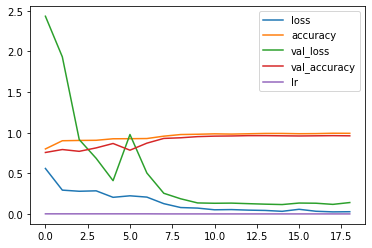

In [32]:
pd.DataFrame(history.history).plot()

In [31]:
model.evaluate(test_data)

16/16 [==============================] - 24s 1s/step - loss: 0.1255 - accuracy: 0.9618


[0.12550568580627441, 0.9617705941200256]